# Setup

In [1]:
# LOAD PACKAGES
using Pkg

In [2]:
Pkg.add("CSV")
Pkg.add("FreqTables")
Pkg.add("HTTP")
Pkg.add("HypothesisTests")
Pkg.add("MLJBase")
Pkg.add("Missings")
Pkg.add("StatsKit") # meta-package that loads packages associated with JuliaStats, including DataFrames, GLM, HypothesisTests,
#and MultivariateStats

   Updating registry at `/srv/julia/pkg/registries/General`
  Resolving package versions...
  Installed PooledArrays ──────────────── v0.5.3
  Installed DataValueInterfaces ───────── v1.0.0
  Installed IteratorInterfaceExtensions ─ v1.0.0
  Installed SentinelArrays ────────────── v1.2.16
  Installed DataAPI ───────────────────── v1.4.0
  Installed Tables ────────────────────── v1.2.2
  Installed CSV ───────────────────────── v0.8.2
  Installed TableTraits ───────────────── v1.0.0
Updating `~/Project.toml`
  [336ed68f] + CSV v0.8.2
Updating `~/Manifest.toml`
  [336ed68f] + CSV v0.8.2
  [9a962f9c] + DataAPI v1.4.0
  [e2d170a0] + DataValueInterfaces v1.0.0
  [82899510] + IteratorInterfaceExtensions v1.0.0
  [69de0a69] + Parsers v1.0.15
  [2dfb63ee] + PooledArrays v0.5.3
  [91c51154] + SentinelArrays v1.2.16
  [3783bdb8] + TableTraits v1.0.0
  [bd369af6] + Tables v1.2.2
  [2a0f44e3] + Base64
  [ade2ca70] + Dates
  [8ba89e20] + Distributed
  [b77e0a4c] + InteractiveUtils
  [8f399da3] + Libd

In [3]:
## Open installed packages
using CSV, FreqTables, HTTP, Missings, StatsKit

┌ Info: Precompiling CSV [336ed68f-0bac-5ca0-87d4-7b16caf5d00b]
└ @ Base loading.jl:1278
┌ Info: Precompiling FreqTables [da1fdf0e-e0ff-5433-a45f-9bb5ff651cb1]
└ @ Base loading.jl:1278
┌ Info: Precompiling HTTP [cd3eb016-35fb-5094-929b-558a96fad6f3]
└ @ Base loading.jl:1278
┌ Info: Precompiling StatsKit [2cb19f9e-ec4d-5c53-8573-a4542a68d3f0]
└ @ Base loading.jl:1278


In [4]:
# check julia version
VERSION

v"1.5.3"

# Set Directory Structure

In [5]:
pwd()

"/home/jovyan/code"

In [6]:
path = "/home/jovyan/"
cd(path)
# or cd("..")

In [7]:
pwd()

"/home/jovyan"

## Make Sub-directories

In [9]:
mkdir("./code")

LoadError: IOError: mkdir: file already exists (EEXIST)

In [9]:
mkdir("./data")

LoadError: IOError: mkdir: file already exists (EEXIST)

In [8]:
mkdir("./figures")

"./figures"

In [9]:
mkdir("./tables")

"./tables"

In [10]:
readdir()

13-element Array{String,1}:
 ".bash_logout"
 ".bashrc"
 ".cache"
 ".config"
 ".git"
 ".profile"
 "Manifest.toml"
 "Project.toml"
 "README.md"
 "code"
 "data"
 "figures"
 "tables"

# Load Data

In [11]:
# if loading from file in data folder (use CSV and DataFrame together)
df1 = CSV.read("./data/original/metoo_data.csv", DataFrame)

,id,senator_party,condition,pid7,pre_sexism_1
,Int64,String,Int64,String,String
1,1,Democrat,2,Strong Republican,Agree strongly
2,2,Republican,2,Not very strong Democrat,Disagree somewhat
3,3,Republican,2,Strong Democrat,Disagree strongly
4,4,Republican,1,Independent,Agree somewhat
5,5,Democrat,3,Strong Democrat,Disagree strongly
6,6,Republican,2,Lean Republican,Neither disagree nor agree
7,7,Republican,3,Strong Democrat,Neither disagree nor agree
8,8,Republican,3,Not very strong Republican,Agree strongly
9,9,Democrat,2,Not very strong Democrat,Disagree strongly


In [28]:
# can index within DataFrame
# e.g., 
# row = df1[1,:]

,id,senator_party,condition,pid7,pre_sexism_1,pre_sexism_2
,Int64,String,Int64,String,String,String
1,1,Democrat,2,Strong Republican,Agree strongly,Disagree strongly


In [16]:
# inspect first 5 rows and first 3 cols
df1[1:5,1:3]

,id,senator_party,condition
,Int64,String,Int64
1,1,Democrat,2
2,2,Republican,2
3,3,Republican,2
4,4,Republican,1
5,5,Democrat,3


# Summary Statistics

In [18]:
describe(df1)

,variable,mean,min,median,max
,Symbol,Union…,Any,Union…,Any
1,id,1404.17,1,1404.5,2807
2,senator_party,,Democrat,,Republican
3,condition,2.00641,1,2.0,3
4,pid7,,Independent,,Strong Republican
5,pre_sexism_1,,Agree somewhat,,Neither disagree nor agree
6,pre_sexism_2,,Agree somewhat,,Neither disagree nor agree
7,pre_sexism_3,,Agree somewhat,,Neither disagree nor agree
8,pre_sexism_4,,Agree somewhat,,Neither disagree nor agree
9,pre_favorability,6.93158,0,7.0,10


# Data Processing

In [12]:
# create and transform new var condition2
df1.condition2 = ""

""

In [13]:
df1[(df1[:condition] .== 1),:condition2]="Jokes"
df1[(df1[:condition] .== 2),:condition2]="Assault"
df1[(df1[:condition] .== 3),:condition2]="Control"

"Control"

In [14]:
df1[1:5,:condition2]

5-element Array{String,1}:
 "Assault"
 "Assault"
 "Assault"
 "Jokes"
 "Control"

In [15]:
# make categorical
df1[:condition2] = CategoricalArray(df1[:condition2])

2806-element CategoricalArray{String,1,UInt32}:
 "Assault"
 "Assault"
 "Assault"
 "Jokes"
 "Control"
 "Assault"
 "Control"
 "Control"
 "Assault"
 "Control"
 "Control"
 "Jokes"
 "Jokes"
 ⋮
 "Jokes"
 "Assault"
 "Assault"
 "Control"
 "Assault"
 "Control"
 "Assault"
 "Jokes"
 "Assault"
 "Assault"
 "Control"
 "Jokes"

In [16]:
# check levels
levels(df1[:condition2])

3-element Array{String,1}:
 "Assault"
 "Control"
 "Jokes"

In [17]:
# reorder levels
levels!(df1[:condition2], ["Control", "Jokes", "Assault"])

2806-element CategoricalArray{String,1,UInt32}:
 "Assault"
 "Assault"
 "Assault"
 "Jokes"
 "Control"
 "Assault"
 "Control"
 "Control"
 "Assault"
 "Control"
 "Control"
 "Jokes"
 "Jokes"
 ⋮
 "Jokes"
 "Assault"
 "Assault"
 "Control"
 "Assault"
 "Control"
 "Assault"
 "Jokes"
 "Assault"
 "Assault"
 "Control"
 "Jokes"

In [18]:
# recheck levels
levels(df1[:condition2])

3-element Array{String,1}:
 "Control"
 "Jokes"
 "Assault"

In [19]:
# create and transform new var pid3
# check tabulation (values)
freqtable(df1.pid7)

8-element Named Array{Int64,1}
Dim1                       │ 
───────────────────────────┼────
Independent                │ 631
Lean Democrat              │ 377
Lean Republican            │ 269
Not sure                   │  23
Not very strong Democrat   │ 359
Not very strong Republican │ 200
Strong Democrat            │ 629
Strong Republican          │ 318

In [20]:
df1.pid3 = ""
df1[(df1[:pid7] .== "Lean Democrat"),:pid3]="Democrat"
df1[(df1[:pid7] .== "Strong Democrat"),:pid3]="Democrat"
df1[(df1[:pid7] .== "Not very strong Democrat"),:pid3]="Democrat"

df1[(df1[:pid7] .== "Lean Republican"),:pid3]="Republican"
df1[(df1[:pid7] .== "Strong Republican"),:pid3]="Republican"
df1[(df1[:pid7] .== "Not very strong Republican"),:pid3]="Republican"

df1[(df1[:pid7] .== "Independent"),:pid3]="Independent"
df1[(df1[:pid7] .== "Not sure"),:pid3]="Independent"

# make categorical
df1[:pid3] = CategoricalArray(df1[:pid3])

2806-element CategoricalArray{String,1,UInt32}:
 "Republican"
 "Democrat"
 "Democrat"
 "Independent"
 "Democrat"
 "Republican"
 "Democrat"
 "Republican"
 "Democrat"
 "Democrat"
 "Democrat"
 "Democrat"
 "Independent"
 ⋮
 "Independent"
 "Democrat"
 "Republican"
 "Independent"
 "Republican"
 "Democrat"
 "Democrat"
 "Republican"
 "Republican"
 "Democrat"
 "Democrat"
 "Republican"

In [53]:
describe(df1)

,variable,mean,min,median,max
,Symbol,Union…,Any,Union…,Any
1,id,1404.17,1,1404.5,2807
2,senator_party,,Democrat,,Republican
3,condition,2.00641,1,2.0,3
4,pid7,,Independent,,Strong Republican
5,pre_sexism_1,,Agree somewhat,,Neither disagree nor agree
6,pre_sexism_2,,Agree somewhat,,Neither disagree nor agree
7,pre_sexism_3,,Agree somewhat,,Neither disagree nor agree
8,pre_sexism_4,,Agree somewhat,,Neither disagree nor agree
9,pre_favorability,6.93158,0,7.0,10


In [17]:
# recode: punishment 

# punishment 1
freqtable(df1.punishment_1)

6-element Named Array{Int64,1}
Dim1                       │ 
───────────────────────────┼────
Agree somewhat             │ 560
Agree strongly             │ 329
Disagree somewhat          │ 415
Disagree strongly          │ 276
Neither disagree nor agree │ 290
missing                    │ 936

In [21]:
# var contains 'missing', which will not process in ==/> kind of functions, so need to recode missing first as ""
df1.punishment_1b = df1.punishment_1
df1.punishment_1b = Missings.replace(df1.punishment_1b, "")

Missings.EachReplaceMissing{PooledArrays.PooledArray{Union{Missing, String},UInt32,1,Array{UInt32,1}},String}(Union{Missing, String}["Neither disagree nor agree", "Disagree somewhat", "Disagree strongly", "Neither disagree nor agree", missing, "Disagree somewhat", missing, missing, "Agree somewhat", missing  …  "Agree strongly", missing, "Disagree strongly", missing, "Disagree somewhat", "Agree strongly", "Agree strongly", "Neither disagree nor agree", missing, "Neither disagree nor agree"], "")

In [22]:
# recode: punishment 

# punishment 1
df1.needmoreevidence = 999
df1[(df1[:punishment_1b] .== "Agree strongly"),:needmoreevidence]=5
df1[(df1[:punishment_1b] .== "Agree somewhat"),:needmoreevidence]=4
df1[(df1[:punishment_1b] .== "Neither disagree nor agree"),:needmoreevidence]=3
df1[(df1[:punishment_1b] .== "Disagree somewhat"),:needmoreevidence]=2
df1[(df1[:punishment_1b] .== "Disagree strongly"),:needmoreevidence]=1

# now recode 999 as missing so future fxn will skip over
df1[:needmoreevidence] = recode(df1[:needmoreevidence], 999=>missing)

freqtable(df1.needmoreevidence, df1.punishment_1)

6×6 Named Array{Int64,2}
Dim1 ╲ Dim2 │             Agree somewhat  …                     missing
────────────┼──────────────────────────────────────────────────────────
1           │                          0  …                           0
2           │                          0                              0
3           │                          0                              0
4           │                        560                              0
5           │                          0                              0
missing     │                          0  …                         936

In [93]:
# punishment 2 (to 'apology')
freqtable(df1.punishment_2)

6-element Named Array{Int64,1}
Dim1                       │ 
───────────────────────────┼────
Agree somewhat             │ 352
Agree strongly             │ 258
Disagree somewhat          │ 360
Disagree strongly          │ 342
Neither disagree nor agree │ 558
missing                    │ 936

In [23]:
# var contains 'missing', which will not process in ==/> kind of functions, so need to recode missing first as ""
df1.punishment_2b = df1.punishment_2
df1.punishment_2b = Missings.replace(df1.punishment_2b, "")

df1.apology = 999
df1[(df1[:punishment_2b] .== "Agree strongly"),:apology]=5
df1[(df1[:punishment_2b] .== "Agree somewhat"),:apology]=4
df1[(df1[:punishment_2b] .== "Neither disagree nor agree"),:apology]=3
df1[(df1[:punishment_2b] .== "Disagree somewhat"),:apology]=2
df1[(df1[:punishment_2b] .== "Disagree strongly"),:apology]=1

# recode 999 as missing
df1[:apology] = recode(df1[:apology], 999=>missing)
freqtable(df1.apology, df1.punishment_2)

6×6 Named Array{Int64,2}
Dim1 ╲ Dim2 │             Agree somewhat  …                     missing
────────────┼──────────────────────────────────────────────────────────
1           │                          0  …                           0
2           │                          0                              0
3           │                          0                              0
4           │                        352                              0
5           │                          0                              0
missing     │                          0  …                         936

In [95]:
# punishment 3 (to 'longtimeago')
freqtable(df1.punishment_3)

6-element Named Array{Int64,1}
Dim1                       │ 
───────────────────────────┼────
Agree somewhat             │ 395
Agree strongly             │ 243
Disagree somewhat          │ 372
Disagree strongly          │ 570
Neither disagree nor agree │ 290
missing                    │ 936

In [24]:
# var contains 'missing', which will not process in ==/> kind of functions, so need to recode missing first as ""
df1.punishment_3b = df1.punishment_3
df1.punishment_3b = Missings.replace(df1.punishment_3b, "")

df1.longtimeago = 999
df1[(df1[:punishment_3b] .== "Agree strongly"),:longtimeago]=5
df1[(df1[:punishment_3b] .== "Agree somewhat"),:longtimeago]=4
df1[(df1[:punishment_3b] .== "Neither disagree nor agree"),:longtimeago]=3
df1[(df1[:punishment_3b] .== "Disagree somewhat"),:longtimeago]=2
df1[(df1[:punishment_3b] .== "Disagree strongly"),:longtimeago]=1

# recode 999 as missing
df1[:longtimeago] = recode(df1[:longtimeago], 999=>missing)
freqtable(df1.longtimeago, df1.punishment_3)

6×6 Named Array{Int64,2}
Dim1 ╲ Dim2 │             Agree somewhat  …                     missing
────────────┼──────────────────────────────────────────────────────────
1           │                          0  …                           0
2           │                          0                              0
3           │                          0                              0
4           │                        395                              0
5           │                          0                              0
missing     │                          0  …                         936

In [97]:
# punishment 4 (to 'resign')
freqtable(df1.punishment_4)

6-element Named Array{Int64,1}
Dim1                       │ 
───────────────────────────┼────
Agree somewhat             │ 219
Agree strongly             │ 172
Disagree somewhat          │ 393
Disagree strongly          │ 679
Neither disagree nor agree │ 407
missing                    │ 936

In [25]:
# var contains 'missing', which will not process in ==/> kind of functions, so need to recode missing first as ""
df1.punishment_4b = df1.punishment_4
df1.punishment_4b = Missings.replace(df1.punishment_4b, "")

df1.resign = 999
df1[(df1[:punishment_4b] .== "Agree strongly"),:resign]=5
df1[(df1[:punishment_4b] .== "Agree somewhat"),:resign]=4
df1[(df1[:punishment_4b] .== "Neither disagree nor agree"),:resign]=3
df1[(df1[:punishment_4b] .== "Disagree somewhat"),:resign]=2
df1[(df1[:punishment_4b] .== "Disagree strongly"),:resign]=1

# recode 999 as missing
df1[:resign] = recode(df1[:resign], 999=>missing)
freqtable(df1.resign, df1.punishment_4)

6×6 Named Array{Int64,2}
Dim1 ╲ Dim2 │             Agree somewhat  …                     missing
────────────┼──────────────────────────────────────────────────────────
1           │                          0  …                           0
2           │                          0                              0
3           │                          0                              0
4           │                        219                              0
5           │                          0                              0
missing     │                          0  …                         936

In [26]:
# punishment 5 (to 'elitecues')
freqtable(df1.punishment_5)

6-element Named Array{Int64,1}
Dim1                       │ 
───────────────────────────┼────
Agree somewhat             │ 360
Agree strongly             │ 170
Disagree somewhat          │ 360
Disagree strongly          │ 385
Neither disagree nor agree │ 595
missing                    │ 936

In [27]:
# var contains 'missing', which will not process in ==/> kind of functions, so need to recode missing first as ""
df1.punishment_5b = df1.punishment_5
df1.punishment_5b = Missings.replace(df1.punishment_5b, "")

df1.elitecues = 999
df1[(df1[:punishment_5b] .== "Agree strongly"),:elitecues]=5
df1[(df1[:punishment_5b] .== "Agree somewhat"),:elitecues]=4
df1[(df1[:punishment_5b] .== "Neither disagree nor agree"),:elitecues]=3
df1[(df1[:punishment_5b] .== "Disagree somewhat"),:elitecues]=2
df1[(df1[:punishment_5b] .== "Disagree strongly"),:elitecues]=1

# recode 999 as missing
df1[:elitecues] = recode(df1[:elitecues], 999=>missing)
freqtable(df1.elitecues, df1.punishment_5)

6×6 Named Array{Int64,2}
Dim1 ╲ Dim2 │             Agree somewhat  …                     missing
────────────┼──────────────────────────────────────────────────────────
1           │                          0  …                           0
2           │                          0                              0
3           │                          0                              0
4           │                        360                              0
5           │                          0                              0
missing     │                          0  …                         936

In [28]:
#############################
# recode punishment: reverse codes
#############################

# need more evidence
df1.needmoreevidence_reverse = 999
df1[(df1[:punishment_1b] .== "Agree strongly"),:needmoreevidence_reverse]=1
df1[(df1[:punishment_1b] .== "Agree somewhat"),:needmoreevidence_reverse]=2
df1[(df1[:punishment_1b] .== "Neither disagree nor agree"),:needmoreevidence_reverse]=3
df1[(df1[:punishment_1b] .== "Disagree somewhat"),:needmoreevidence_reverse]=4
df1[(df1[:punishment_1b] .== "Disagree strongly"),:needmoreevidence_reverse]=5

# now recode 999 as missing so future fxn will skip over
df1[:needmoreevidence_reverse] = recode(df1[:needmoreevidence_reverse], 999=>missing)

freqtable(df1.needmoreevidence_reverse, df1.punishment_1)

6×6 Named Array{Int64,2}
Dim1 ╲ Dim2 │             Agree somewhat  …                     missing
────────────┼──────────────────────────────────────────────────────────
1           │                          0  …                           0
2           │                        560                              0
3           │                          0                              0
4           │                          0                              0
5           │                          0                              0
missing     │                          0  …                         936

In [29]:
# long time ago
df1.longtimeago_reverse = 999
df1[(df1[:punishment_3b] .== "Agree strongly"),:longtimeago_reverse]=1
df1[(df1[:punishment_3b] .== "Agree somewhat"),:longtimeago_reverse]=2
df1[(df1[:punishment_3b] .== "Neither disagree nor agree"),:longtimeago_reverse]=3
df1[(df1[:punishment_3b] .== "Disagree somewhat"),:longtimeago_reverse]=4
df1[(df1[:punishment_3b] .== "Disagree strongly"),:longtimeago_reverse]=5

# recode 999 as missing
df1[:longtimeago_reverse] = recode(df1[:longtimeago_reverse], 999=>missing)
freqtable(df1.longtimeago_reverse, df1.punishment_3)

6×6 Named Array{Int64,2}
Dim1 ╲ Dim2 │             Agree somewhat  …                     missing
────────────┼──────────────────────────────────────────────────────────
1           │                          0  …                           0
2           │                        395                              0
3           │                          0                              0
4           │                          0                              0
5           │                          0                              0
missing     │                          0  …                         936

In [30]:
# new variable: mean punitiveness score ####
df1[:meanpunishment] = ((df1[:apology]+df1[:resign]+df1[:needmoreevidence_reverse]+df1[:longtimeago_reverse])/4)

2806-element Array{Union{Missing, Float64},1}:
 3.25
 3.75
 5.0
 3.0
  missing
 3.5
  missing
  missing
 2.25
  missing
  missing
 3.75
 3.25
 ⋮
 1.75
 3.5
 1.5
  missing
 5.0
  missing
 3.25
 2.0
 1.0
 3.5
  missing
 3.0

In [31]:
describe(df1.meanpunishment)

Summary Stats:
Length:         2806
Missing Count:  936
Mean:           2.868449
Minimum:        1.000000
1st Quartile:   2.000000
Median:         3.000000
3rd Quartile:   3.500000
Maximum:        5.000000
Type:           Union{Missing, Float64}


In [32]:
## new variable: same party as legislator####
freqtable(df1.senator_party, df1.senator_party)

2×2 Named Array{Int64,2}
Dim1 ╲ Dim2 │   Democrat  Republican
────────────┼───────────────────────
Democrat    │       1407           0
Republican  │          0        1399

In [33]:
df1.sameparty = ""
df1[( (df1[:pid3] .== "Democrat") .& (df1[:senator_party] .== "Democrat") ) .|
    ( (df1[:pid3] .== "Republican") .& (df1[:senator_party] .== "Republican") ),:sameparty] ="Same party"

df1[( (df1[:pid3] .== "Democrat") .& (df1[:senator_party] .== "Republican") ) .|
    ( (df1[:pid3] .== "Republican") .& (df1[:senator_party] .== "Democrat") ),:sameparty] ="Opposite party"

df1[(df1[:pid3] .== "Independent"),:sameparty] = "Independents/Not sures" 

#make categorical
df1[:sameparty] = CategoricalArray(df1[:sameparty])

2806-element CategoricalArray{String,1,UInt32}:
 "Opposite party"
 "Opposite party"
 "Opposite party"
 "Independents/Not sures"
 "Same party"
 "Same party"
 "Opposite party"
 "Same party"
 "Same party"
 "Same party"
 "Opposite party"
 "Opposite party"
 "Independents/Not sures"
 ⋮
 "Independents/Not sures"
 "Opposite party"
 "Same party"
 "Independents/Not sures"
 "Same party"
 "Opposite party"
 "Same party"
 "Opposite party"
 "Same party"
 "Opposite party"
 "Opposite party"
 "Same party"

In [34]:
freqtable(df1.sameparty)

3-element Named Array{Int64,1}
Dim1                                                     │ 
─────────────────────────────────────────────────────────┼─────
CategoricalValue{String,UInt32} "Independents/Not sures" │  654
CategoricalValue{String,UInt32} "Opposite party"         │ 1088
CategoricalValue{String,UInt32} "Same party"             │ 1064

In [35]:
# recode: pre sexism ####
# sexism_1,2,4 reverse coded
# see original R code from authors

# tried using recode and dictionaries, but could not get it to work
# instead, generated simple numeric based on values of pre_sexism_#

#df1.pre_sexism_1new = recode(df1.pre_sexism_1, 
#    5=>"Agree strongly",
#    4=>"Agree somewhat",
#    3=>"Neither disagree nor agree",
#    2=>"Disagree somewhat",
#    1=>"Disagree strongly")

# alt: could use dictionary: A = Categorical([1 2;2 1;2 2;1 1], Dict(1=>"male", 2=>"female"))

df1.pre_sexism_1new = 999
df1[ (df1[:pre_sexism_1] .== "Agree strongly"),:pre_sexism_1new] =5
df1[ (df1[:pre_sexism_1] .== "Agree somewhat"),:pre_sexism_1new] =4
df1[ (df1[:pre_sexism_1] .== "Neither disagree nor agree"),:pre_sexism_1new] =3
df1[ (df1[:pre_sexism_1] .== "Disagree somewhat"),:pre_sexism_1new] =2
df1[ (df1[:pre_sexism_1] .== "Disagree strongly"),:pre_sexism_1new] =1
freqtable(df1.pre_sexism_1new)

5-element Named Array{Int64,1}
Dim1  │ 
──────┼────
1     │ 905
2     │ 793
3     │ 459
4     │ 493
5     │ 156

In [36]:
df1.pre_sexism_2new = 999
df1[ (df1[:pre_sexism_2] .== "Agree strongly"),:pre_sexism_2new] =5
df1[ (df1[:pre_sexism_2] .== "Agree somewhat"),:pre_sexism_2new] =4
df1[ (df1[:pre_sexism_2] .== "Neither disagree nor agree"),:pre_sexism_2new] =3
df1[ (df1[:pre_sexism_2] .== "Disagree somewhat"),:pre_sexism_2new] =2
df1[ (df1[:pre_sexism_2] .== "Disagree strongly"),:pre_sexism_2new] =1
freqtable(df1.pre_sexism_2new)

5-element Named Array{Int64,1}
Dim1  │ 
──────┼────
1     │ 919
2     │ 661
3     │ 437
4     │ 556
5     │ 233

In [37]:
df1.pre_sexism_4new = 999
df1[ (df1[:pre_sexism_4] .== "Agree strongly"),:pre_sexism_4new] =5
df1[ (df1[:pre_sexism_4] .== "Agree somewhat"),:pre_sexism_4new] =4
df1[ (df1[:pre_sexism_4] .== "Neither disagree nor agree"),:pre_sexism_4new] =3
df1[ (df1[:pre_sexism_4] .== "Disagree somewhat"),:pre_sexism_4new] =2
df1[ (df1[:pre_sexism_4] .== "Disagree strongly"),:pre_sexism_4new] =1
freqtable(df1.pre_sexism_4new)

5-element Named Array{Int64,1}
Dim1  │ 
──────┼────
1     │ 940
2     │ 684
3     │ 445
4     │ 552
5     │ 185

In [38]:
df1.pre_sexism_3new = 999
df1[ (df1[:pre_sexism_3] .== "Agree strongly"),:pre_sexism_3new] =1
df1[ (df1[:pre_sexism_3] .== "Agree somewhat"),:pre_sexism_3new] =2
df1[ (df1[:pre_sexism_3] .== "Neither disagree nor agree"),:pre_sexism_3new] =3
df1[ (df1[:pre_sexism_3] .== "Disagree somewhat"),:pre_sexism_3new] =4
df1[ (df1[:pre_sexism_3] .== "Disagree strongly"),:pre_sexism_3new] =5
freqtable(df1.pre_sexism_3new)

5-element Named Array{Int64,1}
Dim1  │ 
──────┼────
1     │ 925
2     │ 825
3     │ 504
4     │ 339
5     │ 213

In [39]:
# new variable: pre_sexism ####
df1[:pre_sexism] = ((df1[:pre_sexism_1new] + df1[:pre_sexism_2new] + df1[:pre_sexism_3new] + df1[:pre_sexism_4new])/4)

2806-element Array{Float64,1}:
 3.75
 2.75
 2.0
 3.25
 1.0
 3.0
 3.0
 4.0
 1.0
 1.5
 2.0
 4.25
 3.0
 ⋮
 3.75
 1.5
 2.5
 2.25
 1.0
 1.0
 1.75
 4.0
 3.0
 3.5
 1.0
 3.0

In [40]:
# recode post_sexism
# sexism_1,2,4 reverse coded (same as pre_sexism)
# see original R code from authors

df1.post_sexism_1new = 999
df1[ (df1[:post_sexism_1] .== "Agree strongly"),:post_sexism_1new] =5
df1[ (df1[:post_sexism_1] .== "Agree somewhat"),:post_sexism_1new] =4
df1[ (df1[:post_sexism_1] .== "Neither disagree nor agree"),:post_sexism_1new] =3
df1[ (df1[:post_sexism_1] .== "Disagree somewhat"),:post_sexism_1new] =2
df1[ (df1[:post_sexism_1] .== "Disagree strongly"),:post_sexism_1new] =1

df1.post_sexism_2new = 999
df1[ (df1[:post_sexism_2] .== "Agree strongly"),:post_sexism_2new] =5
df1[ (df1[:post_sexism_2] .== "Agree somewhat"),:post_sexism_2new] =4
df1[ (df1[:post_sexism_2] .== "Neither disagree nor agree"),:post_sexism_2new] =3
df1[ (df1[:post_sexism_2] .== "Disagree somewhat"),:post_sexism_2new] =2
df1[ (df1[:post_sexism_2] .== "Disagree strongly"),:post_sexism_2new] =1

df1.post_sexism_4new = 999
df1[ (df1[:post_sexism_4] .== "Agree strongly"),:post_sexism_4new] =5
df1[ (df1[:post_sexism_4] .== "Agree somewhat"),:post_sexism_4new] =4
df1[ (df1[:post_sexism_4] .== "Neither disagree nor agree"),:post_sexism_4new] =3
df1[ (df1[:post_sexism_4] .== "Disagree somewhat"),:post_sexism_4new] =2
df1[ (df1[:post_sexism_4] .== "Disagree strongly"),:post_sexism_4new] =1

df1.post_sexism_3new = 999
df1[ (df1[:post_sexism_3] .== "Agree strongly"),:post_sexism_3new] =1
df1[ (df1[:post_sexism_3] .== "Agree somewhat"),:post_sexism_3new] =2
df1[ (df1[:post_sexism_3] .== "Neither disagree nor agree"),:post_sexism_3new] =3
df1[ (df1[:post_sexism_3] .== "Disagree somewhat"),:post_sexism_3new] =4
df1[ (df1[:post_sexism_3] .== "Disagree strongly"),:post_sexism_3new] =5

# new variable: post_sexism ####
df1[:post_sexism] = ((df1[:post_sexism_1new] + df1[:post_sexism_2new] + df1[:post_sexism_3new] + df1[:post_sexism_4new])/4)

2806-element Array{Float64,1}:
 2.0
 3.25
 1.75
 4.0
 1.0
 3.0
 3.25
 4.0
 1.0
 1.25
 2.0
 4.0
 3.75
 ⋮
 4.0
 1.0
 2.5
 2.25
 1.0
 1.0
 1.75
 5.0
 3.0
 3.25
 1.0
 3.0

In [41]:
### new variables: 
# raw change from pretest to posttest ####
# favorability
df1[:change_favorability] = (df1.post_favorability.+1) - (df1.pre_favorability.+1)

2806-element Array{Int64,1}:
  0
 -3
 -3
 -2
  1
 -1
 -1
  0
 -5
 -1
  0
 -2
  0
  ⋮
  1
 -2
  0
  1
 -9
  0
 -2
  3
 -1
 -2
  0
 -3

In [42]:
# vote
df1[:change_vote] = (df1.post_vote) - (df1.pre_vote)

2806-element Array{Int64,1}:
  4
 -1
  0
  1
  0
  0
  2
  0
 -4
 -2
  0
 -1
  0
  ⋮
  1
 -3
  0
  0
 -9
  1
 -2
  1
 -2
  1
  0
 -3

In [43]:
# sexism
df1[:change_sexism] = (df1.post_sexism) - (df1.pre_sexism)

2806-element Array{Float64,1}:
 -1.75
  0.5
 -0.25
  0.75
  0.0
  0.0
  0.25
  0.0
  0.0
 -0.25
  0.0
 -0.25
  0.75
  ⋮
  0.25
 -0.5
  0.0
  0.0
  0.0
  0.0
  0.0
  1.0
  0.0
 -0.25
  0.0
  0.0

In [44]:
### new variables: 
# percent change from pretest to posttest ##### favorability
df1[:perchange_favorability] = (((df1[:post_favorability].+1) - (df1[:pre_favorability].+1))./(df1[:pre_favorability].+1))*100

2806-element Array{Float64,1}:
   0.0
 -50.0
 -50.0
 -25.0
  14.285714285714285
 -12.5
 -12.5
   0.0
 -45.45454545454545
 -11.11111111111111
   0.0
 -50.0
   0.0
   ⋮
  16.666666666666664
 -25.0
   0.0
  10.0
 -90.0
   0.0
 -28.57142857142857
 150.0
 -12.5
 -22.22222222222222
   0.0
 -33.33333333333333

In [45]:
# vote
df1[:perchange_vote] = (((df1.post_vote.+1) - (df1.pre_vote.+1))./(df1.pre_vote.+1))*100

2806-element Array{Float64,1}:
 100.0
 -25.0
   0.0
  14.285714285714285
   0.0
   0.0
  28.57142857142857
   0.0
 -36.36363636363637
 -20.0
   0.0
 -33.33333333333333
   0.0
   ⋮
  14.285714285714285
 -50.0
   0.0
   0.0
 -90.0
  10.0
 -28.57142857142857
  33.33333333333333
 -18.181818181818183
  11.11111111111111
   0.0
 -37.5

In [46]:
# sexism
df1[:perchange_sexism] = (((df1[:post_sexism].+1) - (df1[:pre_sexism].+1))./(df1[:pre_sexism].+1))*100

2806-element Array{Float64,1}:
 -36.84210526315789
  13.333333333333334
  -8.333333333333332
  17.647058823529413
   0.0
   0.0
   6.25
   0.0
   0.0
 -10.0
   0.0
  -4.761904761904762
  18.75
   ⋮
   5.263157894736842
 -20.0
   0.0
   0.0
   0.0
   0.0
   0.0
  20.0
   0.0
  -5.555555555555555
   0.0
   0.0

In [47]:
# subset: without independents/notsures 
partydat = df1[(df1[:sameparty] .!= "Independents/Not sures"),:]

,id,senator_party,condition,pid7,pre_sexism_1
,Int64,String,Int64,String,String
1,1,Democrat,2,Strong Republican,Agree strongly
2,2,Republican,2,Not very strong Democrat,Disagree somewhat
3,3,Republican,2,Strong Democrat,Disagree strongly
4,5,Democrat,3,Strong Democrat,Disagree strongly
5,6,Republican,2,Lean Republican,Neither disagree nor agree
6,7,Republican,3,Strong Democrat,Neither disagree nor agree
7,8,Republican,3,Not very strong Republican,Agree strongly
8,9,Democrat,2,Not very strong Democrat,Disagree strongly
9,10,Democrat,3,Strong Democrat,Disagree strongly


In [48]:
# subset: people that share party with senator, people that do not share party with senator
samepartydat = df1[(df1[:sameparty] .!= "Same party"),:]
opppartydat = df1[(df1[:sameparty] .!= "Opposite party"),:]

,id,senator_party,condition,pid7,pre_sexism_1
,Int64,String,Int64,String,String
1,4,Republican,1,Independent,Agree somewhat
2,5,Democrat,3,Strong Democrat,Disagree strongly
3,6,Republican,2,Lean Republican,Neither disagree nor agree
4,8,Republican,3,Not very strong Republican,Agree strongly
5,9,Democrat,2,Not very strong Democrat,Disagree strongly
6,10,Democrat,3,Strong Democrat,Disagree strongly
7,13,Republican,1,Independent,Agree somewhat
8,14,Republican,1,Not very strong Republican,Agree somewhat
9,15,Republican,3,Lean Republican,Disagree somewhat


## Means and T-tests

In [78]:
# Means
describe(df1[:post_favorability][df1.condition2 .== "Control"])

Summary Stats:
Length:         936
Missing Count:  0
Mean:           7.112179
Minimum:        0.000000
1st Quartile:   6.000000
Median:         7.000000
3rd Quartile:   9.000000
Maximum:        10.000000
Type:           Int64


In [79]:
describe(df1[:post_favorability][df1.condition2 .== "Assault"])

Summary Stats:
Length:         952
Missing Count:  0
Mean:           4.388655
Minimum:        0.000000
1st Quartile:   2.000000
Median:         5.000000
3rd Quartile:   6.000000
Maximum:        10.000000
Type:           Int64


In [80]:
describe(df1[:post_favorability][df1.condition2 .== "Jokes"])

Summary Stats:
Length:         918
Missing Count:  0
Mean:           5.337691
Minimum:        0.000000
1st Quartile:   4.000000
Median:         5.000000
3rd Quartile:   7.000000
Maximum:        10.000000
Type:           Int64


In [82]:
describe(df1[:post_vote][df1.condition2 .== "Control"])

Summary Stats:
Length:         936
Missing Count:  0
Mean:           6.168803
Minimum:        0.000000
1st Quartile:   5.000000
Median:         7.000000
3rd Quartile:   8.000000
Maximum:        10.000000
Type:           Int64


In [83]:
describe(df1[:post_vote][df1.condition2 .== "Assault"])

Summary Stats:
Length:         952
Missing Count:  0
Mean:           4.012605
Minimum:        0.000000
1st Quartile:   1.000000
Median:         5.000000
3rd Quartile:   6.000000
Maximum:        10.000000
Type:           Int64


In [84]:
describe(df1[:post_vote][df1.condition2 .== "Jokes"])

Summary Stats:
Length:         918
Missing Count:  0
Mean:           4.847495
Minimum:        0.000000
1st Quartile:   2.000000
Median:         5.000000
3rd Quartile:   7.000000
Maximum:        10.000000
Type:           Int64


In [51]:
Pkg.add("HypothesisTests")
using HypothesisTests

  Resolving package versions...
Updating `~/Project.toml`
  [09f84164] + HypothesisTests v0.10.2
No Changes to `~/Manifest.toml`


LoadError: MethodError: no method matching getindex(::DataFrame, ::Bool)
Closest candidates are:
  getindex(::DataFrame, ::Integer, !Matched::Union{Signed, Unsigned}) at /srv/julia/pkg/packages/DataFrames/GtZ1l/src/dataframe/dataframe.jl:383
  getindex(::DataFrame, ::Integer, !Matched::Union{AbstractString, Symbol}) at /srv/julia/pkg/packages/DataFrames/GtZ1l/src/dataframe/dataframe.jl:398
  getindex(::AbstractDataFrame, ::Integer, !Matched::Colon) at /srv/julia/pkg/packages/DataFrames/GtZ1l/src/dataframerow/dataframerow.jl:128
  ...

In [73]:
EqualVarianceTTest(tempdf[:post_favorability][tempdf.condition2 .== "Control"],
    tempdf[:post_favorability][tempdf.condition2 .== "Assault"])
# shows mean difference of 2.7 (same as on p3 of publication), and p<0.001

Two sample t-test (equal variance)
----------------------------------
Population details:
    parameter of interest:   Mean difference
    value under h_0:         0
    point estimate:          2.72352
    95% confidence interval: (2.5034, 2.9437)

Test summary:
    outcome with 95% confidence: reject h_0
    two-sided p-value:           <1e-99

Details:
    number of observations:   [936,952]
    t-statistic:              24.26329139391319
    degrees of freedom:       1886
    empirical standard error: 0.11224874567833158


# Histogram of outcome of interest

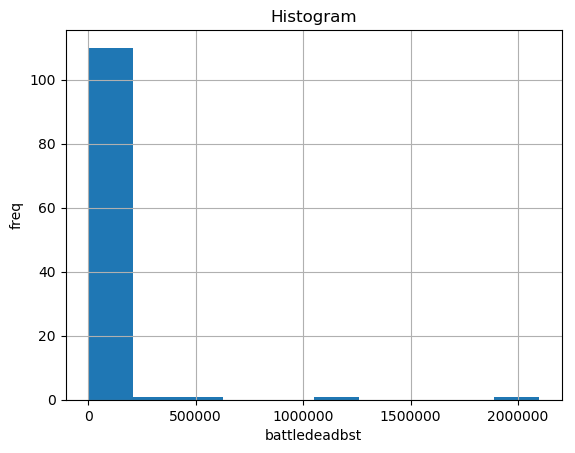

PyObject Text(0.5, 1.0, 'Histogram')

In [42]:
#ioff()
h = plt[:hist](df1[:battledeadbest],10) # Histogram, PyPlot.plt required to differentiate with conflicting hist command

grid("on")
xlabel("battledeadbst")
ylabel("freq")
title("Histogram")

#gcf() # Needed for IJulia to plot inline

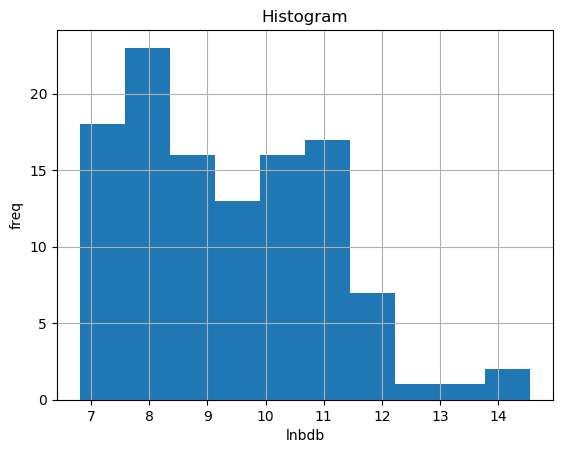

PyObject Text(0.5, 1.0, 'Histogram')

In [43]:
#ioff()
h = plt[:hist](df1[:lnbdb],10) # Histogram, PyPlot.plt required to differentiate with conflicting hist command

grid("on")
xlabel("lnbdb")
ylabel("freq")
title("Histogram")
#gcf()

# Linear Regression

## OLS estimation with StatsModels

In [43]:
# Figure 1
# using StatsModels
#m1a = fit(LinearModel, @formula(perchange_favorability ~ condition2), samepartydat)
#m1b = fit(LinearModel, @formula(perchange_favorability ~ condition2), opppartydat)

# using GLM

m1a = lm(@formula(perchange_favorability ~ condition2), samepartydat)
m1b = lm(@formula(perchange_favorability ~ condition2), opppartydat)
m1a

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

perchange_favorability ~ 1 + condition2

Coefficients:
──────────────────────────────────────────────────────────────────────────────────
                         Coef.  Std. Error       t  Pr(>|t|)  Lower 95%  Upper 95%
──────────────────────────────────────────────────────────────────────────────────
(Intercept)            4.03311     1.32455    3.04    0.0024    1.43523    6.63098
condition2: Jokes    -24.2476      1.87892  -12.91    <1e-35  -27.9328   -20.5624
condition2: Assault  -34.4374      1.86366  -18.48    <1e-69  -38.0926   -30.7821
──────────────────────────────────────────────────────────────────────────────────

In [44]:
m1b

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

perchange_favorability ~ 1 + condition2

Coefficients:
───────────────────────────────────────────────────────────────────────────────────
                         Coef.  Std. Error       t  Pr(>|t|)   Lower 95%  Upper 95%
───────────────────────────────────────────────────────────────────────────────────
(Intercept)            2.52698     1.00249    2.52    0.0118    0.560748    4.49322
condition2: Jokes    -19.1096      1.42662  -13.40    <1e-38  -21.9077    -16.3115
condition2: Assault  -30.2836      1.40628  -21.53    <1e-90  -33.0418    -27.5254
───────────────────────────────────────────────────────────────────────────────────

In [66]:
coefdf = DataFrame()
coefdf.names = coefnames(m1a)[2:end] # no intercept
coefdf.coefs = coef(m1a)[2:end]
coefdf.err = stderror(m1a)[2:end]


2-element Array{Float64,1}:
 1.8789159656557712
 1.8636609259645347

In [67]:
function coefplot(m)
       n = coefnames(m)[2:end] # no intercept
       vals = coef(m)[2:end]
       errors = stderror(m)[2:end]
       scatter(
           n,
           vals,
           #seriestype = :scatter,
           #legend = false,
           yerror = 1.96 .* errors,
           title = "Coefficient plot"
       )
end

coefplot (generic function with 1 method)

  Resolving package versions...
  Installed FFMPEG_jll ──────── v4.3.1+4
  Installed Grisu ───────────── v1.0.0
  Installed GeometryBasics ──── v0.3.5
  Installed FixedPointNumbers ─ v0.8.4
  Installed ColorTypes ──────── v0.10.9
  Installed RecipesPipeline ─── v0.2.1
  Installed LibVPX_jll ──────── v1.9.0+1
  Installed OpenSSL_jll ─────── v1.1.1+6
  Installed Ogg_jll ─────────── v1.3.4+2
  Installed LaTeXStrings ────── v1.2.0
  Installed EarCut_jll ──────── v2.1.5+1
  Installed Measures ────────── v0.3.1
  Installed FFMPEG ──────────── v0.4.0
  Installed FreeType2_jll ───── v2.10.1+5
  Installed Zlib_jll ────────── v1.2.11+18
  Installed Plots ───────────── v1.10.1
  Installed libvorbis_jll ───── v1.3.6+6
  Installed x264_jll ────────── v2020.7.14+2
  Installed Formatting ──────── v0.4.2
  Installed Opus_jll ────────── v1.3.1+3
  Installed FriBidi_jll ─────── v1.0.5+6
  Installed Scratch ─────────── v1.0.3
  Installed Contour ─────────── v0.5.7
  Installed x265_jll ────────── v3.0.0+3

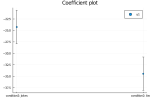

In [62]:
Pkg.add("Plots")
using Plots

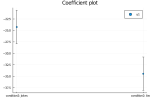

In [68]:
coefplot(m1a)

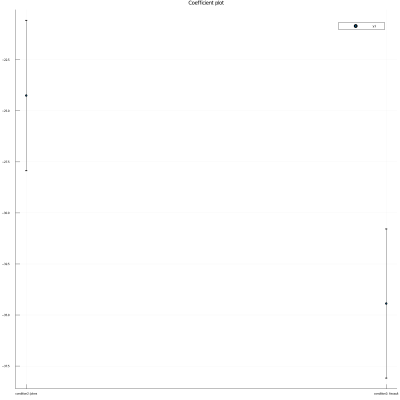

In [78]:
plot(coefdf.names,
           coefdf.coefs,
           seriestype = :scatter,
           #legend = false,
           yerror = 1.96 .* coefdf.err,
           title = "Coefficient plot"
       )
plot!(size=(1600,1600))

In [23]:
# diagnostics

In [52]:
Pkg.add("StatPlots")
Pkg.add("Plots")

 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]


In [53]:
using StatPlots, Plots

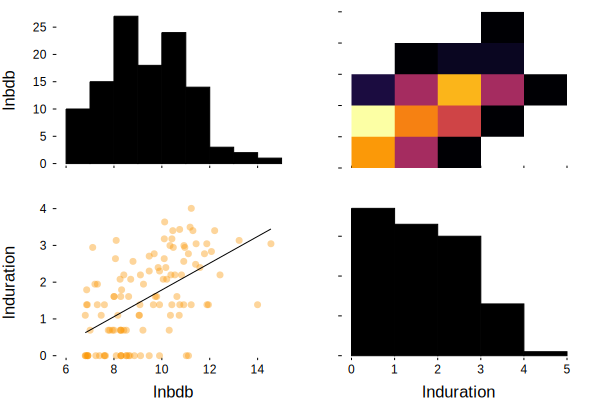

In [55]:
@df df2 corrplot([:lnbdb :lnduration], grid = false)